# Titanic dataset from Kaggle

At first, the necessary modules/packages are imported

In [1]:
import numpy as np  # Numerical library
import pandas as pd # Data analysis library

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
cf.go_offline()
from sklearn.model_selection import train_test_split,KFold,StratifiedKFold
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report,accuracy_score

import pickle

%matplotlib inline
fig_params={'legend.fontsize':20,
          'axes.labelsize': 24,
          'axes.titlesize':24,
          'xtick.labelsize':18,
          'ytick.labelsize':18,             
          'axes.facecolor':'#D9DDD1'}
plt.rcParams.update(fig_params)

## Load and take an overview of the dataset

In [2]:
df=pd.read_csv('./titanic/train.csv')

In [3]:
print('Variables in the data set')
print(df.columns)
print('Data type')
print(df.dtypes)

Variables in the data set
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Data type
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


'PassengerID' is an indentifier (index)
'Survived' is a label which informs if passager survived(1) or not (0)
'Pclass' denotes ticket class First(1),second(2) and third(3)
'Sex' is sex of a passanger
'Age' is age

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:>

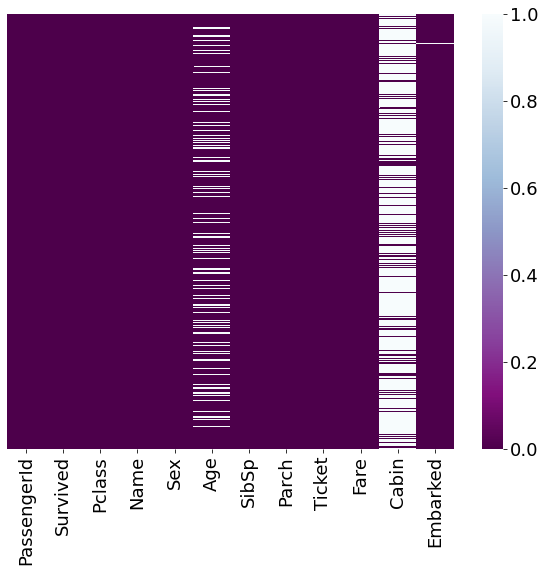

In [7]:
fig=plt.figure(figsize=(10,8))
sns.heatmap(df.isnull(),cmap='BuPu_r',yticklabels=False)

How many people survived

Total not survived : 549
Total survived : 342


/home/chaitanya/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Survived', ylabel='count'>

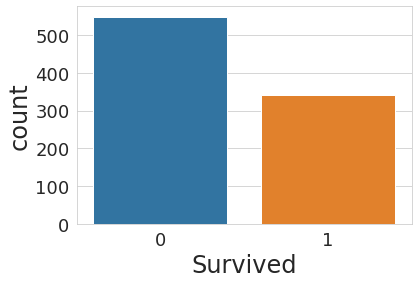

In [8]:
print('Total not survived :',(df['Survived']==0).sum())
print('Total survived :',(df['Survived']==1).sum())

sns.set_style('whitegrid')
sns.countplot(df['Survived'])

In [9]:
print('Total number of male survivors : ',((df['Sex']=='male') & (df['Survived']==1)).sum())
print('Total number of female survivors : ',((df['Sex']=='female') & (df['Survived']==1)).sum())
print()
print('Total number of male deaths : ',((df['Sex']=='male') & (df['Survived']==0)).sum())
print('Total number of female deaths : ',((df['Sex']=='female') & (df['Survived']==0)).sum())

Total number of male survivors :  109
Total number of female survivors :  233

Total number of male deaths :  468
Total number of female deaths :  81


Plotting above data

/home/chaitanya/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:643: UserWarning:

Using the countplot function without specifying `order` is likely to produce an incorrect plot.



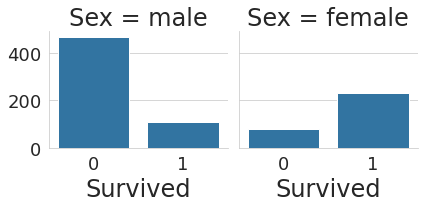

In [10]:
g=sns.FacetGrid(data=df,col='Sex')
g.map(sns.countplot,'Survived')
plt.show()

Alternative is as follows

<AxesSubplot:xlabel='Survived', ylabel='count'>

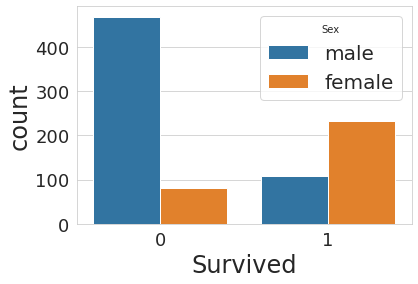

In [11]:
sns.countplot(x='Survived',hue='Sex',data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

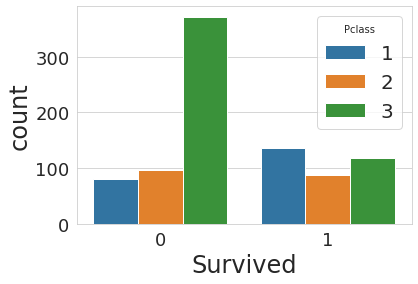

In [12]:
sns.countplot(x='Survived',hue='Pclass',data=df)

<AxesSubplot:xlabel='Sex', ylabel='count'>

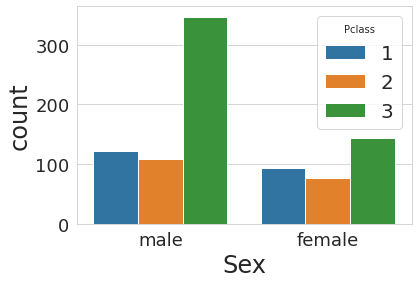

In [13]:
sns.countplot(x='Sex',hue='Pclass',data=df)

/home/chaitanya/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 0, 'Male')

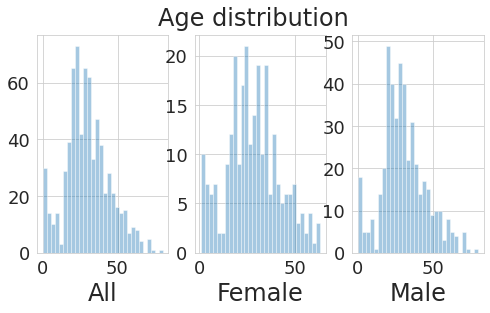

In [14]:
fig,ax=plt.subplots(nrows=1,ncols=3,figsize=(8,4))
fig.suptitle('Age distribution',fontsize=24)
sns.distplot(ax=ax[0],x=df['Age'].dropna(),kde=False,bins=30)
sns.distplot(ax=ax[1],x=df['Age'][df['Sex']=='female'].dropna(),kde=False,bins=30)
sns.distplot(ax=ax[2],x=df['Age'][df['Sex']=='male'].dropna(),kde=False,bins=30)
ax[0].set_xlabel('All')
ax[1].set_xlabel('Female')
ax[2].set_xlabel('Male')

Check how many people had siblings/spouse on board

<AxesSubplot:xlabel='SibSp', ylabel='count'>

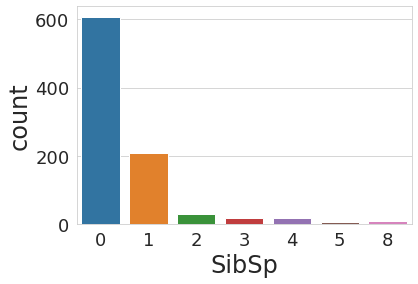

In [15]:
sns.countplot(x='SibSp',data=df)

<AxesSubplot:xlabel='Fare', ylabel='Count'>

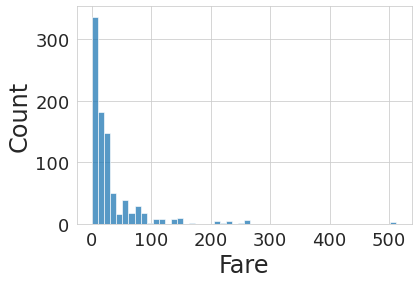

In [16]:
sns.histplot(x='Fare',data=df,bins=50)

In [17]:
df['Fare'].idxmax()

258

In [18]:
df[df['Ticket']=='LINE']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S


## Clean the data

In [19]:
df.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [20]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Filling the missing values
#### Embarked column

In [21]:
# Rows where 'Embarked' column as missing values
df[df['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [22]:
pd.crosstab(df['Survived'],df['Embarked'])

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


In [23]:
df.groupby(['Embarked','Survived']).mean()

PassengerId    Pclass        Age     SibSp     Parch  \
Embarked Survived                                                         
C        0          409.853333  2.200000  33.666667  0.253333  0.253333   
         1          473.989247  1.634409  28.973671  0.494624  0.451613   
Q        0          480.404255  2.936170  30.325000  0.510638  0.276596   
         1          319.966667  2.866667  22.500000  0.300000  0.000000   
S        0          449.868852  2.545667  30.203966  0.611241  0.348946   
         1          448.857143  1.967742  28.113184  0.493088  0.539171   

                        Fare  
Embarked Survived             
C        0         35.443335  
         1         79.720926  
Q        0         13.335904  
         1         13.182227  
S        0         20.743987  
         1         39.547081

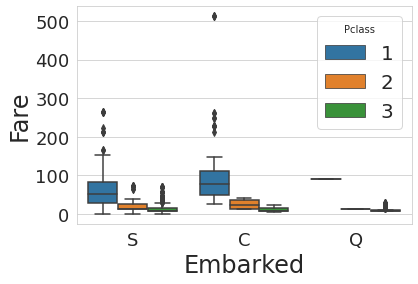

In [24]:
sns.boxplot(x='Embarked',y='Fare',hue='Pclass',data=df)
plt.show()

#df[['Embarked','Fare']].pivot(columns='Embarked',values='Fare',).iplot(kind='box')

In [25]:
embarkFare=df.groupby(['Embarked','Pclass'])['Fare'].mean()
embarkFare

Embarked  Pclass
C         1         104.718529
          2          25.358335
          3          11.214083
Q         1          90.000000
          2          12.350000
          3          11.183393
S         1          70.364862
          2          20.327439
          3          14.644083
Name: Fare, dtype: float64

In [26]:
def fillEmbark(col,embarkFare):
    a=embarkFare.index
    Pclass=col[2]
    embarked=col[1]
    fare=col[0]
    compFare=np.array([embarkFare[('C',Pclass)],embarkFare[('Q',Pclass)],embarkFare[('S',Pclass)]])
    if pd.isnull(embarked):
        ind=(np.abs(compFare-fare)).argmin()   
        if ind==0:
            embarked='C'
        elif ind==1:
            embarked='Q'
        elif ind==2:
            embarked='S'      
    return embarked
    
        

In [27]:
df['Embarked']=df[['Fare','Embarked','Pclass']].apply(fillEmbark,embarkFare=embarkFare,axis=1)

#### Fare column

In [28]:
embarkFare[('C',1)]

104.71852941176469

In [29]:
def fillFare(col,embarkFare):
    a=embarkFare.index
    Pclass=col[2]
    embarked=col[1]
    fare=col[0]
    ind=(embarked,Pclass)
    if pd.isnull(fare):
        fare=embarkFare[ind]
    return fare

#### Age column

In [30]:
df[df['Age'].isna()]['Pclass'].value_counts()

3    136
1     30
2     11
Name: Pclass, dtype: int64

In [31]:
# Rows where 'Age' column has missing values
pd.crosstab(df['Age'].median(),df['Sex'])

Sex,female,male
row_0,,
28.0,314,577


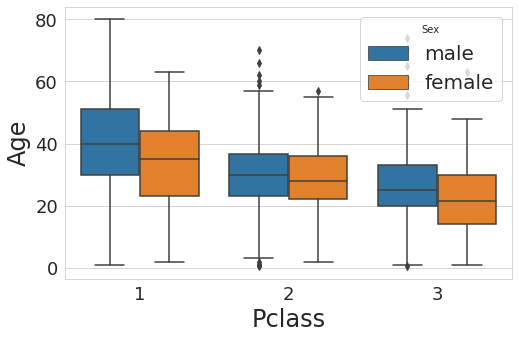

In [32]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Pclass',y='Age',hue='Sex',data=df)
plt.show()

In [33]:
df['Name'].iloc[1].split(',')[1].split('.')[0]

' Mrs'

In [34]:
df['title']=df['Name'].apply(lambda x:x.split(',')[1].split('.')[0])

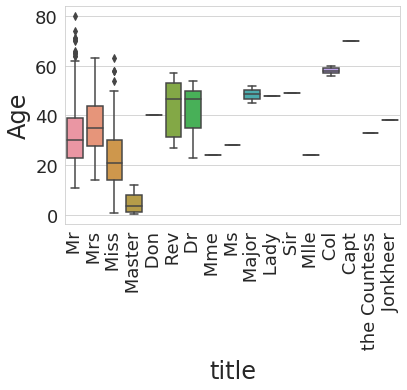

In [35]:
sns.boxplot(x='title',y='Age',data=df)
plt.xticks(rotation=90)
plt.show()

In [36]:
df['title'].value_counts()

 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Col               2
 Major             2
 Mlle              2
 Mme               1
 Lady              1
 Capt              1
 the Countess      1
 Ms                1
 Don               1
 Jonkheer          1
 Sir               1
Name: title, dtype: int64

In [37]:
ageEstimate=df.groupby('title')['Age'].mean()

In [38]:
ageEstimate[ageEstimate.index==' Col'][0]

58.0

In [39]:
def fillAge(col,ageEst):
    title=col[1]
    age=col[0]
    if pd.isnull(age):
        age=ageEst[ageEst.index==title][0]
    return age

In [40]:
df['Age']=df[['Age','title']].apply(fillAge,ageEst=ageEstimate,axis=1)

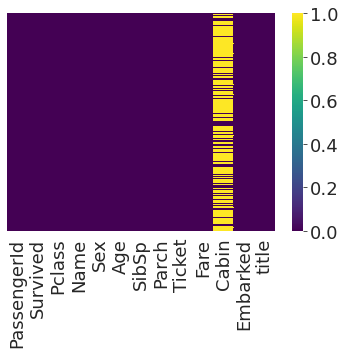

In [41]:
sns.heatmap(pd.isna(df),yticklabels=False,cmap='viridis')
plt.show()

## Convert catagorical data to numerical

In [42]:
df['female']=pd.get_dummies(df['Sex']).drop('male',axis=1)


In [43]:
df[['C','Q']]=pd.get_dummies(df['Embarked']).drop('S',axis=1)

In [44]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'title', 'female', 'C',
       'Q'],
      dtype='object')

In [45]:
X=df[['Pclass', 'Age', 'SibSp','Parch', 'Fare',  'female', 'C','Q']]
y=df['Survived']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [47]:
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,female,C,Q
734,2,23.0,0,0,13.0000,0,0,0
789,1,46.0,0,0,79.2000,0,1,0
453,1,49.0,1,0,89.1042,0,1,0
344,2,36.0,0,0,13.0000,0,0,0
336,1,29.0,1,0,66.6000,0,0,0


## Normalize data

In [48]:
def get_score(model,train_x,test_x,train_y,test_y):
    model.fit(train_x,train_y)
    y_pred=model.predict(test_x)
    return model.score(test_x,test_y)

In [49]:
scoreB_svc=[]
scoreB_rnF=[]
scoreB_logR=[]
scoreB_knn=[]

kf=KFold(n_splits=4)

for tr_ind,ts_ind in kf.split(X,y):
    train_x,test_x,train_y,test_y=X.iloc[tr_ind],X.iloc[ts_ind],y[tr_ind],y[ts_ind]
    scoreB_logR.append(get_score(LogisticRegression(solver='liblinear',multi_class='ovr'),train_x,test_x,train_y,test_y))
    scoreB_rnF.append(get_score(RandomForestClassifier(n_estimators=80),train_x,test_x,train_y,test_y))
    scoreB_svc.append(get_score(SVC(),train_x,test_x,train_y,test_y))
    scoreB_knn.append(get_score(KNeighborsClassifier(),train_x,test_x,train_y,test_y))

In [50]:
print('Logistic Regression',scoreB_logR,np.mean(scoreB_logR))
print('\n')
print('Random forest',scoreB_rnF,np.mean(scoreB_rnF))
print('\n')
print('Support vector machine',scoreB_svc,np.mean(scoreB_svc))
print('\n')
print('K nearest neighbours',scoreB_knn,np.mean(scoreB_knn))

Logistic Regression [0.7847533632286996, 0.7892376681614349, 0.7668161434977578, 0.8198198198198198] 0.7901567486769281


Random forest [0.7713004484304933, 0.8340807174887892, 0.8116591928251121, 0.8198198198198198] 0.8092150446410536


Support vector machine [0.600896860986547, 0.6591928251121076, 0.6681614349775785, 0.6891891891891891] 0.6543600775663555


K nearest neighbours [0.6547085201793722, 0.6905829596412556, 0.7040358744394619, 0.7162162162162162] 0.6913858926190765


In [70]:
model=RandomForestClassifier(n_estimators=80)
model.fit(X_train,y_train)
y_pred_train=model.predict(X_test)

print(classification_report(y_test,y_pred_train))


              precision    recall  f1-score   support

           0       0.81      0.89      0.85       155
           1       0.83      0.72      0.77       113

    accuracy                           0.82       268
   macro avg       0.82      0.80      0.81       268
weighted avg       0.82      0.82      0.81       268



### Save model to the disk using pickle

In [71]:
filename='rnF_titanic_final.sav'
pickle.dump(model,open(filename,'wb'))

## Test data

In [72]:
df_t=pd.read_csv('./titanic/test.csv')

In [73]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [74]:
df_t.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [75]:

df_t['title']=df_t['Name'].apply(lambda x:x.split(',')[1].split('.')[0])
df_t['Embarked']=df_t[['Fare','Embarked','Pclass']].apply(fillEmbark,embarkFare=embarkFare,axis=1)
df_t['Age']=df_t[['Age','title']].apply(fillAge,ageEst=ageEstimate,axis=1)
df_t['Fare']=df_t[['Fare','Embarked','Pclass']].apply(fillFare,embarkFare=embarkFare,axis=1)

In [76]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  title        418 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 39.3+ KB


In [77]:
df_t['female']=pd.get_dummies(df_t['Sex']).drop('male',axis=1)
df_t[['C','Q']]=pd.get_dummies(df_t['Embarked']).drop('S',axis=1)

In [78]:
X_test_f=df_t[['Pclass', 'Age', 'SibSp','Parch', 'Fare',  'female', 'C','Q']]

In [79]:
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,female,C,Q
734,2,23.0,0,0,13.0000,0,0,0
789,1,46.0,0,0,79.2000,0,1,0
453,1,49.0,1,0,89.1042,0,1,0
344,2,36.0,0,0,13.0000,0,0,0
336,1,29.0,1,0,66.6000,0,0,0


In [80]:
X_test_f[X_test_f['Fare'].isnull()]

,Pclass,Age,SibSp,Parch,Fare,female,C,Q


In [81]:
model.predict(X_test_f)

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,

In [82]:
load_model=pickle.load(open(filename,'rb'))

In [83]:
y_pred_final=load_model.predict(X_test_f)

In [84]:
submission=pd.DataFrame({'PassengerID':df_t['PassengerId'],'Survived':y_pred_final})
submission.head()

,PassengerID,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1


In [85]:
filename='Titanic_Predictions_1.csv'
submission.to_csv(filename,index=False)

In [86]:
submission.head()

,PassengerID,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1
